# Quick start2 -Relative-densityratio with multi dimensional samples and optional parameter setting.-

### Generate data

For example,

Generate two samples that follow the 2-dimentional normal distribution of $\mathcal{N(\mu_1,\Sigma_1)}$ and $\mathcal{N(\mu_2,\Sigma_2)}$, respectively, and estimate the relative density ratio
$$r_\alpha (x) = p(x)/(\alpha p(x)+(1-\alpha)q(x)).$$

In [1]:
import densityratio
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

import seaborn as sns

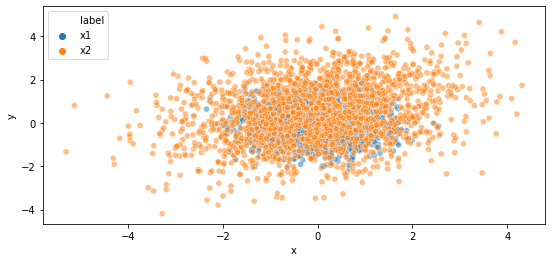

In [2]:
m = [[0.,0.],[0,0.5]]
s = [np.array([[0.5,0],
                [0,0.5]]),
      np.array([[2.0,0.5],
                [0.5,2.0]])]
np.random.seed(10)
x1 = np.random.multivariate_normal(m[0], s[0], size = 2000)
x2 = np.random.multivariate_normal(m[1], s[1], size = 2000)
df = pd.DataFrame({'x':np.r_[x1[:,0],x2[:,0]],'y':np.r_[x1[:,1],x2[:,1]],'label':['x1']*len(x1)+['x2']*len(x2)})

fig = plt.figure(figsize=(9,4))
ax = fig.add_subplot(111)
sns.scatterplot(data=df, x='x', y='y', alpha=0.5,hue='label',ax=ax)
fig.savefig('pic/QS2_samples.png')

### Estimate relative-densityratio and optional parameters setting

If a value is set for *sigma, lamb*, that value is used, and if a numerical array is set, the *densityratio()* selects the optimum value by CV.   
The *alpha* is a parameter that can adjust the mixing ratio, and is set in the range of \[0,1.\].   
The *kernel_number* is the number of kernels in the linear model.

In [3]:
dens = densityratio.densratio(x1,x2,sigma=[0.1, 0.3, 0.5, 0.7, 1., 2., 5.], lamb=[0.01, 0.02, 0.03, 0.04, 0.05],kernel_num=200,alpha=0.2)

'    100% |################################| 0day  0:00:00 Total time: 0day  0:00:13'


Found optimal sigma = 1.0, lambda = 0.03, score=-1.1123469285235925


### Compare the true with estimated.

In this case, the true density ratio $r_\alpha(x)$ is known, so we can compare $r_\alpha(x)$ with the estimated density ratio $\hat{r_\alpha}(x)$.    
The code below gives the following output:

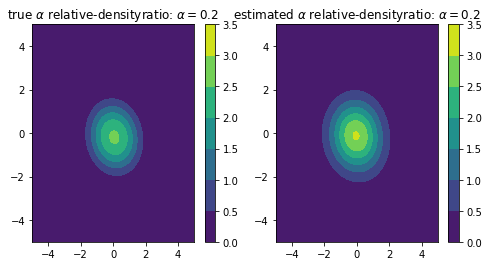

In [4]:
X,Y = np.meshgrid(np.linspace(-5,5,100),np.linspace(-5,5,100))
data = np.c_[X.ravel(),Y.ravel()]
x1_pdf = lambda x: scipy.stats.multivariate_normal.pdf(x,m[0],s[0])
x2_pdf = lambda x: scipy.stats.multivariate_normal.pdf(x,m[1],s[1])
Z_true = x1_pdf(data)/(0.2*x1_pdf(data)+0.8*x2_pdf(data))

fig = plt.figure(figsize=[8,4])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
levels=np.arange(0,4,0.5)
ax1.set_title(r'true $\alpha$ relative-densityratio: $\alpha=0.2$')
ax2.set_title(r'estimated $\alpha$ relative-densityratio: $\alpha=0.2$')
a = ax1.contourf(X,Y,Z_true.reshape(100,100),levels=levels)
b = ax2.contourf(X,Y,dens(np.c_[X.ravel(),Y.ravel()]).reshape(100,100),levels=levels)
fig.colorbar(a, ax=ax1)
fig.colorbar(b, ax=ax2)
fig.savefig('pic/QS2_ratio.png')

To get the parameters used for the density ratio calculation, call the following method.

In [5]:
print('lambda=',dens.lambda_)
print('sigma=',dens.sigma)
print('alpha=',dens.alpha)
print('kernel_num=',dens.N_kernels)
print('kernel_centers',dens.kernel_centers)

lambda= 0.03
sigma= 1.0
alpha= 0.2
kernel_num= 200
kernel_centers [[ 0.02377048 -0.25920837]
 [-0.20338471 -0.96117772]
 [-1.33279034 -0.50735775]
 [-0.75928973 -0.52361848]
 [ 0.94747098  0.0207251 ]
 [-0.0737822   1.48519369]
 [ 0.32321606 -0.6394115 ]
 [ 0.56368488  1.01802253]
 [-0.04449306  0.5814748 ]
 [-0.61582558 -0.03658363]
 [ 0.39620693  0.37043912]
 [-0.89207866 -0.15504042]
 [ 0.47335193 -0.23876321]
 [-0.32952201  0.63846558]
 [-0.36491955 -0.45809803]
 [-0.8888448  -1.28694801]
 [ 0.31037418 -0.29525544]
 [ 0.33771254 -0.55824605]
 [ 0.58101737  0.18435993]
 [-0.01061096 -0.30879058]
 [-0.11147066 -1.26092777]
 [ 0.19302499  0.570287  ]
 [ 0.36642956  0.44777025]
 [ 0.82531267 -0.40444868]
 [-0.31298631  0.9092903 ]
 [ 1.50309845 -0.6022211 ]
 [ 0.57290249  0.83962894]
 [-0.75144713 -0.72488489]
 [-0.28800775 -1.22494142]
 [ 0.78444615  0.08553111]
 [ 2.08391348  0.22947593]
 [ 0.80972108 -0.0352448 ]
 [-0.83357592 -0.10545275]
 [-1.11670004  1.35347361]
 [-0.29924866 -1